In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re # library for regular expression operations

**Regular expressions** and is used for handling regular expressions in Python. 
Regular expressions are patterns used to match and manipulate text. Common functions include re.compile(),re.search(),...

In [5]:
#importing the dataset
df = pd.read_csv(r'C:\Users\yesmi\OneDrive\Desktop\Junior Spring Semester\Data Mining\SMS Spam\spam.csv', 
                  encoding='latin-1', usecols = [0, 1])

* **latin-1** is specified as the encoding, which is a widely used character encoding that supports most Western European languages.
* **usecols =[0,1]**: only the first two columns of the CSV file will be read and loaded into the DataFrame.

In [6]:
df.rename(columns = {'v1':'label','v2':'text'},inplace=True) #rename columns

The **"inplace=True"** parameter specifies that the changes should be made to the DataFrame df itself.

In [29]:
df['class'] = df.label.map({'ham':0, 'spam':1}) 
df.head()

,label,text,copy,class
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri numbr wkli comp win fa cup final tk...,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,0


Created a new column named **'class'** in the DataFrame with a binary classification, where 0 corresponds to non-spam (ham) messages and 1 corresponds to spam messages.

In [8]:
# Copy the text in a new column named copy
df['copy'] = df.text 

# Text Preprocessing

The text preprocessing is also divided into the following tasks:

-   Lower casing.
-   Removal of Punctuations.
-   Removal of Stopwords.
-   Stemming.

In [13]:
import nltk # Natural Language Toolkit. a leading platform for building Python programs to work with human language data.
from nltk.corpus import stopwords
porter = nltk.PorterStemmer() #"distribute", "distributing", "distributor" or "distribution".
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# We create a function clean_text for an automatic preprocessing
def clean_text(string):
        
    message = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', string)
    message = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', #Replace URLs with 'httpaddr'
                         message)
    message = re.sub(r'£|\$', 'money', message) #Replace money symbols with 'moneysymb'
    message = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'phonenumbr'
        'phonenumbr', message)
    message = re.sub(r'\d+(\.\d+)?', 'numbr', message)  #Replace numbers with 'numbr'
    message = re.sub(r'[^\w\d\s]', ' ', message)
    message = re.sub(r'\s+', ' ', message)
    message = re.sub(r'^\s+|\s+?$', '', message.lower())
    return ' '.join(
    porter.stem(term)
    for term in message.split() if term not in set(stop_words)
     )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#test the clean_text function
clean_text("hwo are you to in       klk     456987 Dstribution  ???  I have ,.$, 1000 $, 5 £, ")

'hwo klk numbr dstribut money numbr money numbr money'

In [18]:
#apply clean_text function it on the text copy column

textCopy = df['text'].copy()
textCopy = textCopy.apply(clean_text)
df["copy"] = textCopy
df.head(5)

,label,text,copy
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri numbr wkli comp win fa cup final tk...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(textCopy)

tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
ngrams = vectorizer.fit_transform(textCopy).toarray()

- **CountVectorizer** is used for converting a collection of text documents into a matrix of token counts. It takes in a list of strings and performs operations such as tokenization, removing stop words, and converting the text into a numerical representation.
- **TfidfVectorizer**: The inverse document frequency measures how rare a term is in the document. 

In [33]:
from collections import Counter
spam_df = df[df['class'] == 1] # extrac spam text
ham_df = df[df['class'] == 0] # extract of ham text
spam_df['copy'] = spam_df['copy'].map(clean_text) # clean spam text
ham_df['copy'] = ham_df['copy'].map(clean_text) # clean ham text 
spam_df['new_column'] = spam_df['copy'].apply(lambda x: Counter(x.split(' ')))

C:\Users\yesmi\AppData\Local\Temp\ipykernel_107944\2428209125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['copy'] = spam_df['copy'].map(clean_text) # clean spam text
C:\Users\yesmi\AppData\Local\Temp\ipykernel_107944\2428209125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_df['copy'] = ham_df['copy'].map(clean_text) # clean ham text
C:\Users\yesmi\AppData\Local\Temp\ipykernel_107944\2428209125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

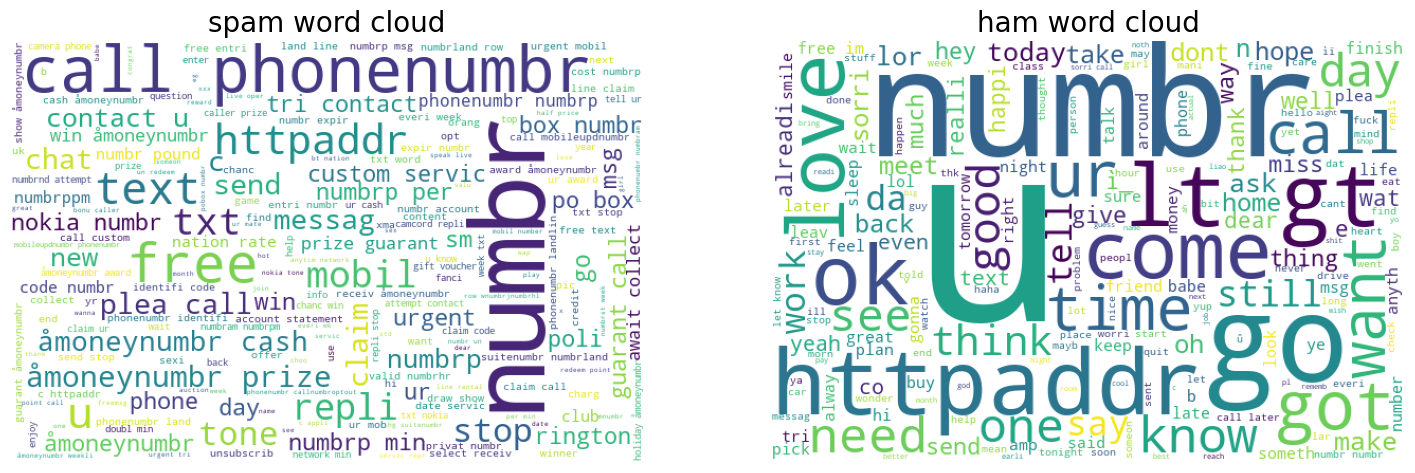

In [36]:
!pip install wordcloud
from wordcloud import WordCloud
forS=" ".join(spam_df['copy'])
forH=" ".join(ham_df['copy'])
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(forS)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(forH)
fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))
ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 20)
ax2.imshow(ham_word_cloud)
ax2.axis('off')
ax2.set_title('ham word cloud', fontsize = 20)
plt.show()

# Naive Bayes Classification

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

- **MultinomialNB** is a Naive Bayes classifier that works well with discrete data, such as word counts, and is often used for text classification.
- **Classification_report** is a function that generates a report of various classification metrics such as precision, recall, and F1 score (harmonic mean of precision and recall)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(ngrams, df['class'].values, test_size=.40)
#For text datasets, the sample in large, so we can split (0.4-.06) or even (0.5-0.5) instead of (0.2-0.8).
NBmodel=MultinomialNB()
NBmodel.fit(x_train, y_train)
y_predict = NBmodel.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1938
           1       0.90      0.93      0.92       291

    accuracy                           0.98      2229
   macro avg       0.94      0.96      0.95      2229
weighted avg       0.98      0.98      0.98      2229



# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(ngrams, df['class'].values, test_size=.40)

In [45]:
DTmodel=DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)
y_predict = DTmodel.predict(x_test)
print("Acuracy for Decision Tree" )
print(classification_report(y_test, y_predict))

Acuracy for Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1923
           1       0.93      0.88      0.90       306

    accuracy                           0.97      2229
   macro avg       0.95      0.93      0.94      2229
weighted avg       0.97      0.97      0.97      2229



# Logistic Regression Classifier 

In [46]:
LRmodel=LogisticRegression()
LRmodel.fit(x_train, y_train)
y_predict = LRmodel.predict(x_test)
print("Acuracy for Logistic Regression")
print(classification_report(y_test, y_predict))

Acuracy for Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1923
           1       0.99      0.86      0.92       306

    accuracy                           0.98      2229
   macro avg       0.98      0.93      0.95      2229
weighted avg       0.98      0.98      0.98      2229



Logistic regression classifier seems to be the most accurate model.